In [18]:
# Import necessary libraries for EDA and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
# Load the dataset
file_path = "C:\\Users\\ramit\\Documents\\Statmaskproject\\SML-project\\training_data.csv"
df = pd.read_csv(file_path)

# Display basic statistics of the numerical features
numerical_summary = df.describe()
df


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


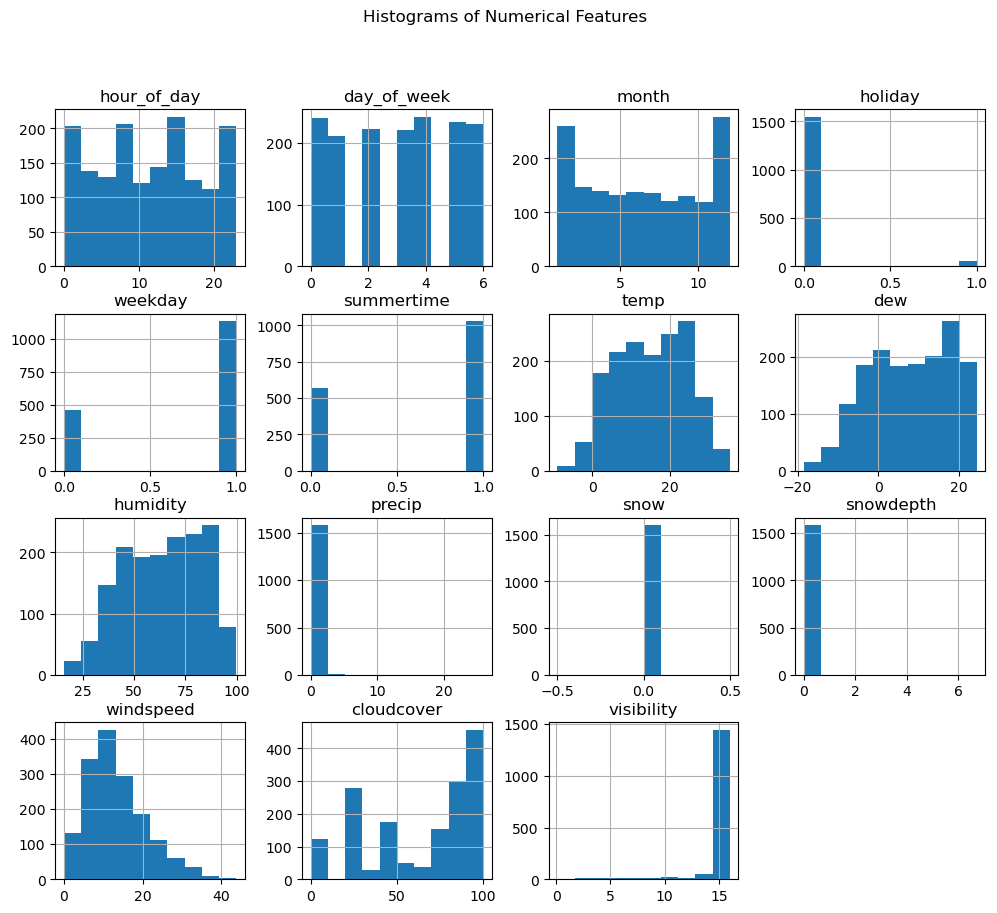

Numerical Features: Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility'],
      dtype='object')
Categorical Features: Index(['increase_stock'], dtype='object')


In [20]:
# Plot histograms for numerical features
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=["float64", "int64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

C:\Users\ramit\AppData\Local\Temp\ipykernel_19952\4292767844.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hour_of_day", y="increase_stock", data=df, ci=None)


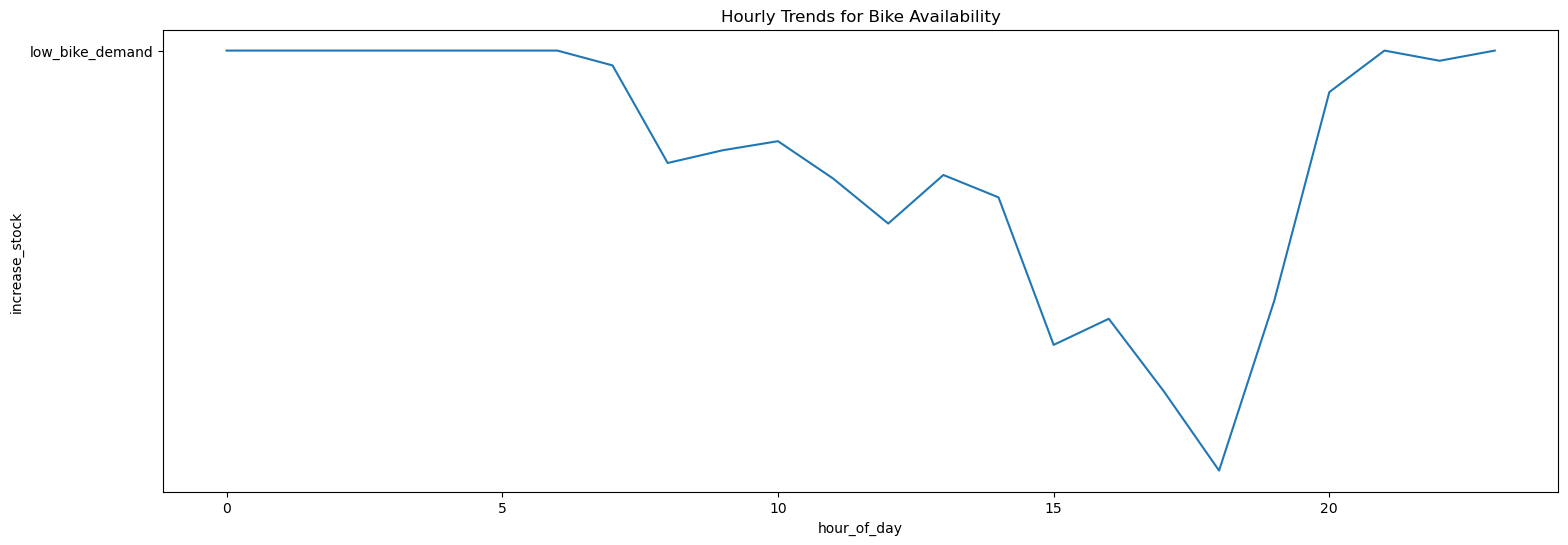

C:\Users\ramit\AppData\Local\Temp\ipykernel_19952\4292767844.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="day_of_week", y="increase_stock", data=df, ci=None)


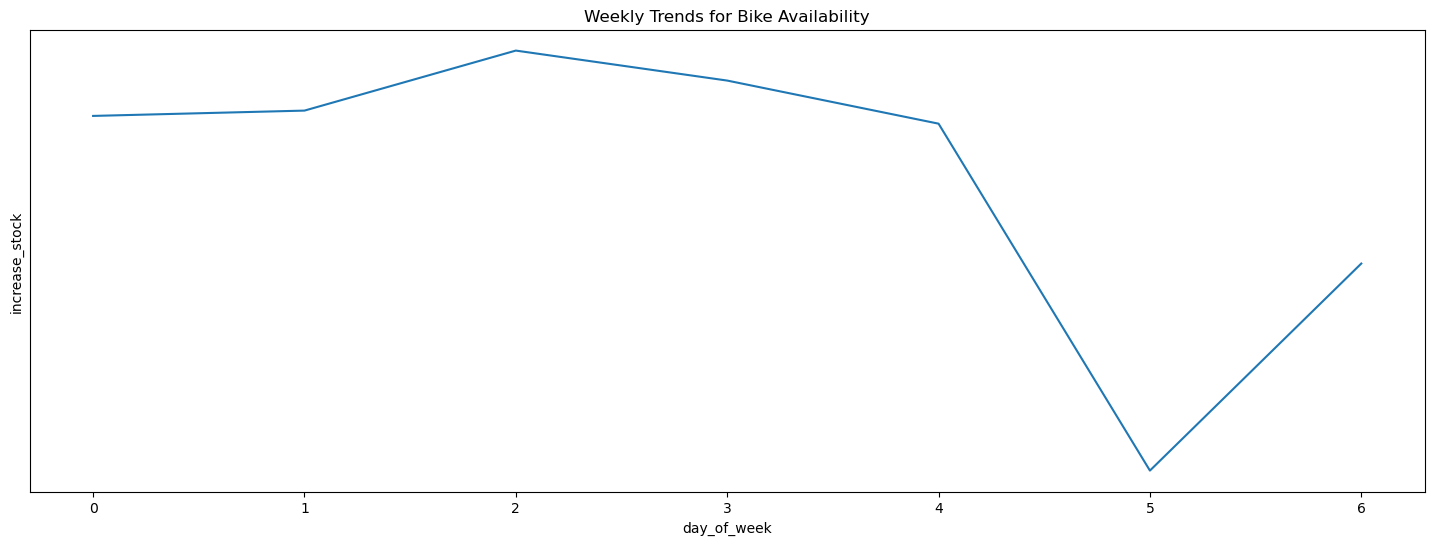

C:\Users\ramit\AppData\Local\Temp\ipykernel_19952\4292767844.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="month", y="increase_stock", data=df, ci=None)


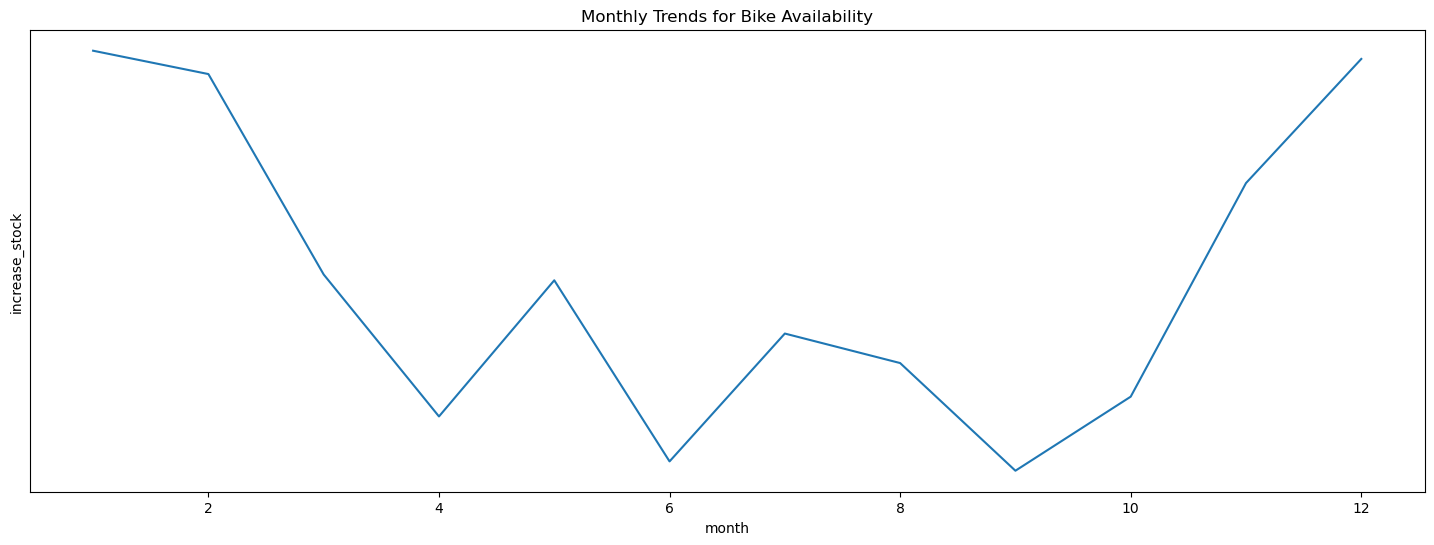

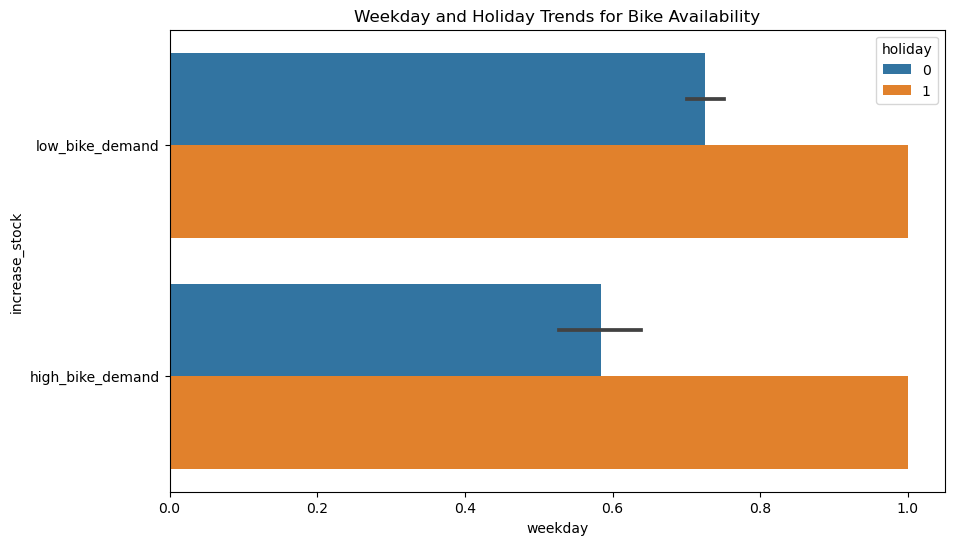

C:\Users\ramit\AppData\Local\Temp\ipykernel_19952\4292767844.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hour_of_day", y="increase_stock", hue="precip", data=df, ci=None)


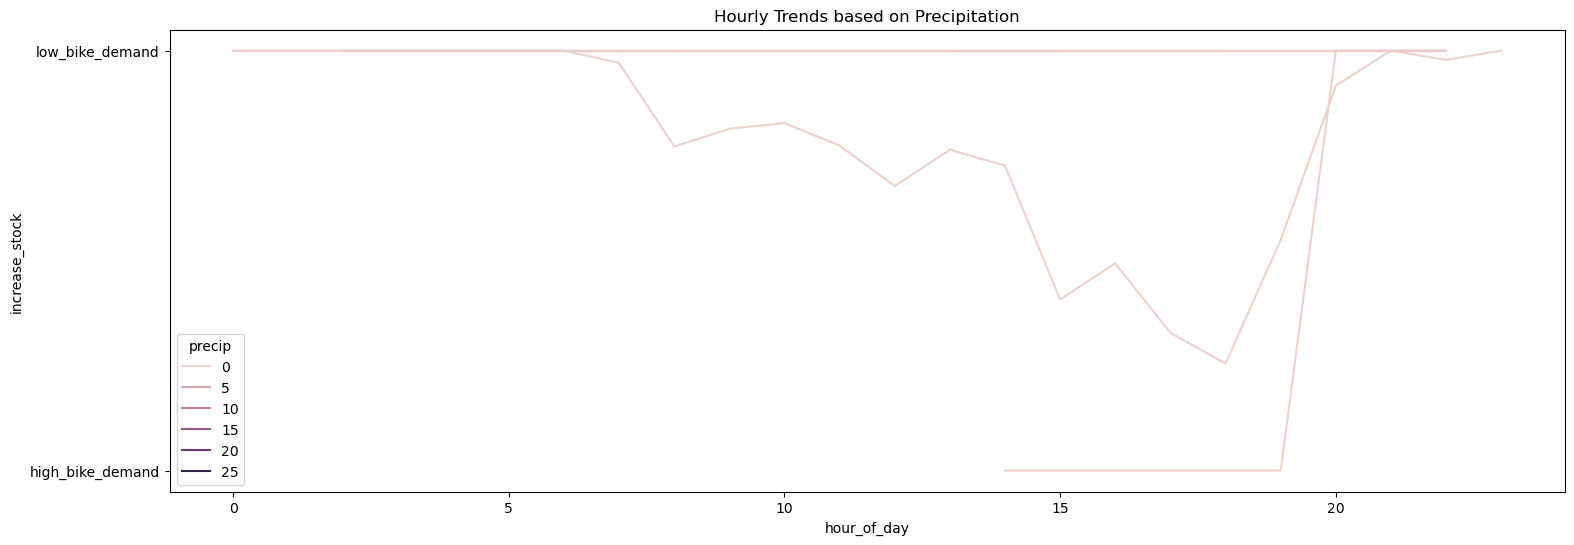

C:\Users\ramit\AppData\Local\Temp\ipykernel_19952\4292767844.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hour_of_day", y="increase_stock", hue="snow", data=df, ci=None)


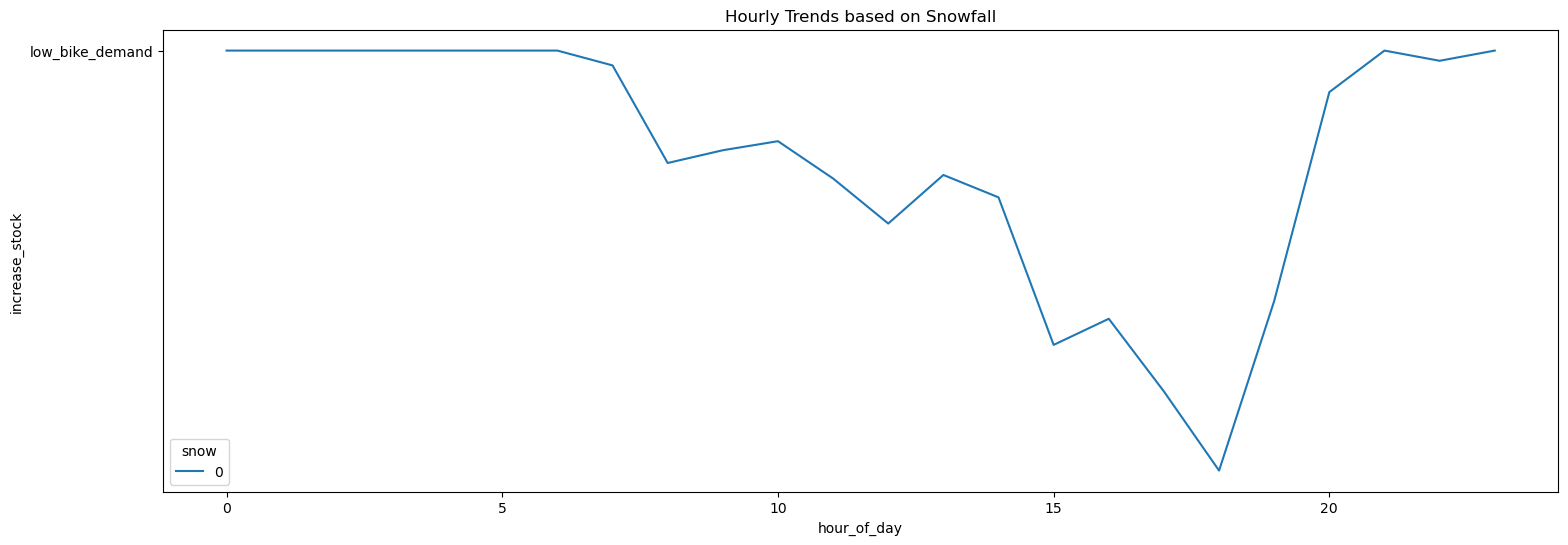

In [21]:

# (i) Identify numerical and categorical features
# (ii) Explore trends related to the target variable
# Plot trends for different hours, weeks, and months
plt.figure(figsize=(18, 6))
sns.lineplot(x="hour_of_day", y="increase_stock", data=df, ci=None)
plt.title("Hourly Trends for Bike Availability")
plt.show()

plt.figure(figsize=(18, 6))
sns.lineplot(x="day_of_week", y="increase_stock", data=df, ci=None)
plt.title("Weekly Trends for Bike Availability")
plt.show()

plt.figure(figsize=(18, 6))
sns.lineplot(x="month", y="increase_stock", data=df, ci=None)
plt.title("Monthly Trends for Bike Availability")
plt.show()

# Compare weekdays and holidays
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="increase_stock", hue="holiday", data=df)
plt.title("Weekday and Holiday Trends for Bike Availability")
plt.show()

# Explore trends based on weather conditions
plt.figure(figsize=(18, 6))
sns.lineplot(x="hour_of_day", y="increase_stock", hue="precip", data=df, ci=None)
plt.title("Hourly Trends based on Precipitation")
plt.show()

plt.figure(figsize=(18, 6))
sns.lineplot(x="hour_of_day", y="increase_stock", hue="snow", data=df, ci=None)
plt.title("Hourly Trends based on Snowfall")
plt.show()



In [22]:
# Additional visualizations for other weather-related features can be added

# Split the data into features (X) and target variable (y)
X = df.drop("increase_stock", axis=1)
y = df["increase_stock"]

# Split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data (use only the first 1440 values)
model.fit(X_train, y_train)

# Make predictions on the remaining 160 values for testing
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


c:\Users\ramit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop("increase_stock", axis=1)
y = df["increase_stock"]

# Split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Parameters={
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1, 10, 25, 50, 100, 1000],
}

# Specify the logistic regression model
logistic_model = LogisticRegression()

# Initialize the grid search with logistic regression and parameter grid
logicgrid = GridSearchCV(logistic_model, Parameters, scoring='accuracy', refit=True)

# Train the model on the training data
logicgrid.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = logicgrid.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions
y_pred = logicgrid.predict(X_test)


TypeError: GridSearchCV.__init__() missing 1 required positional argument: 'param_grid'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


In [ ]:
#Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")